## Before reproduction, the single-cell h5ad files of 101 samples in this study need to be obtained

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt

# Load original single-cell h5ad file
adata = sc.read("/pool1/liujianhong/prj/20250103_FEV1%pred_Model/00.h5ad/COPD_20241022.h5ad") # 

/home/liujianhong/anaconda3/envs/liujh_pytorch/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/liujianhong/anaconda3/envs/liujh_pytorch/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/liujianhong/anaconda3/envs/liujh_pytorch/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/liujianhong/anaconda3/envs/liujh_pytorch/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/liujianhong/anaconda3/envs/liujh_pytorch/lib/python3

/tmp/ipykernel_3185832/1055177523.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby("sample")["celltype"].value_counts(normalize=True).unstack(fill_value=0)
/tmp/ipykernel_3185832/1055177523.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts_abs = adata.obs.groupby(["sample", "celltype"]).size().unstack(fill_value=0)


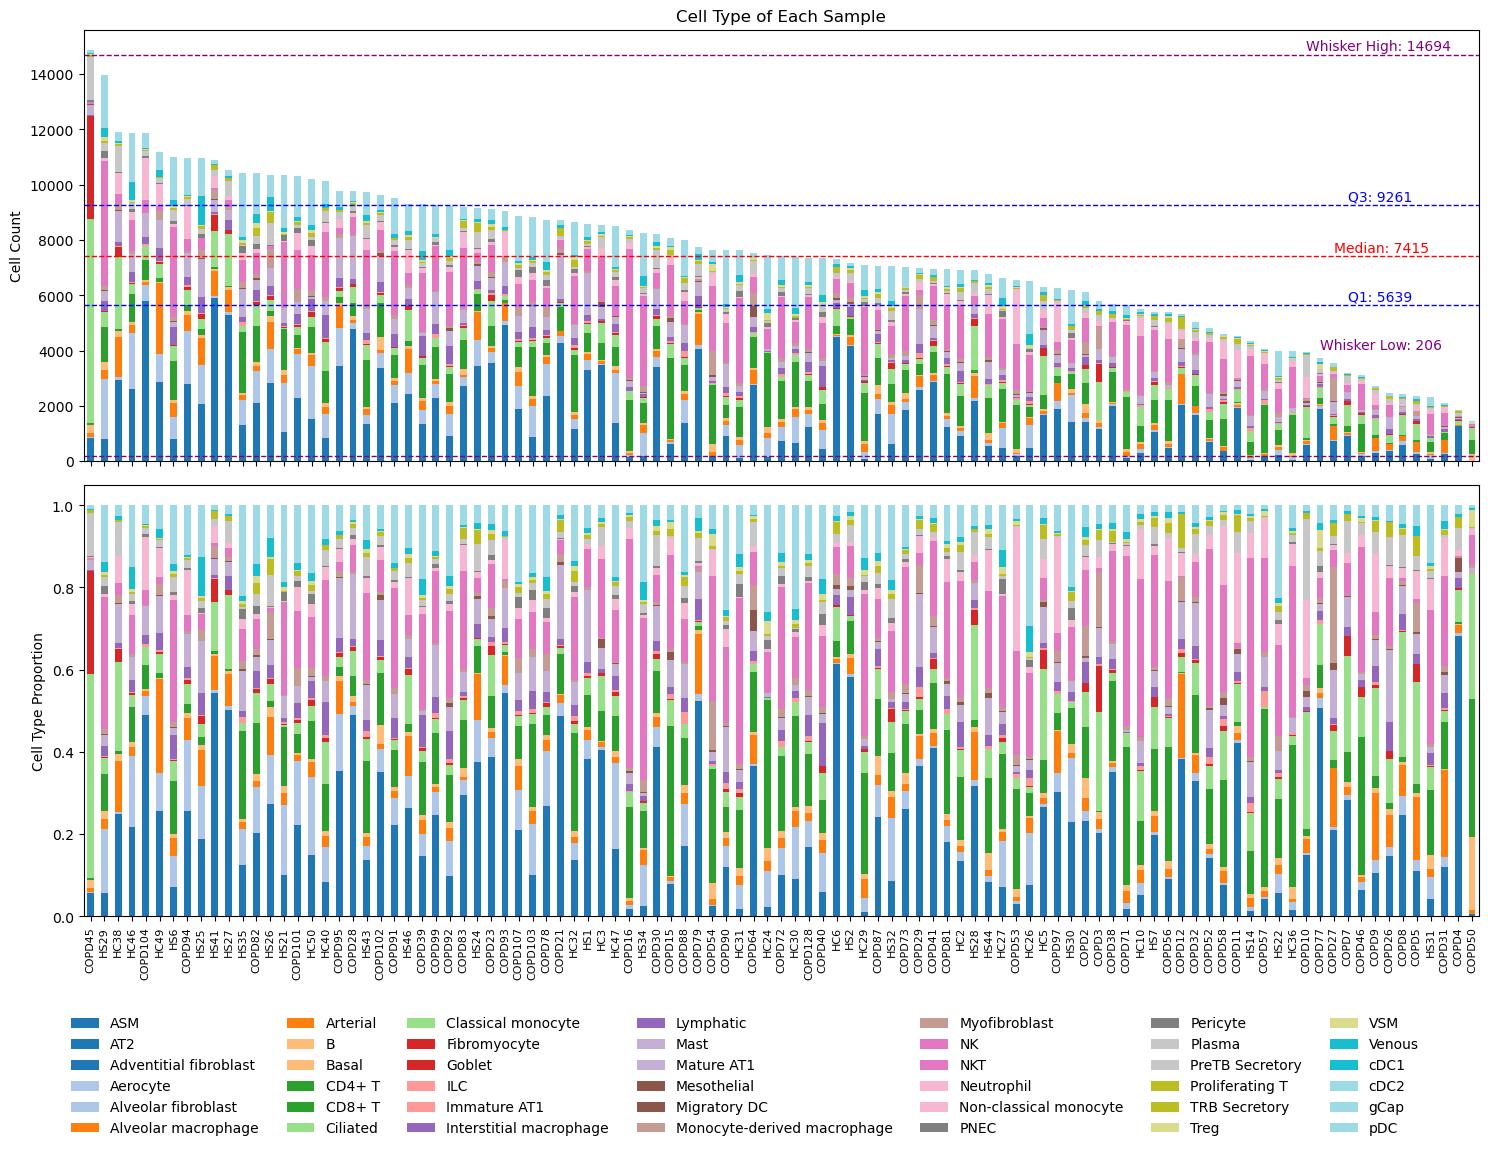

In [ ]:
### Number of cells per cell type [original]

cell_type_counts = adata.obs.groupby("sample")["celltype"].value_counts(normalize=True).unstack(fill_value=0)
cell_type_counts_abs = adata.obs.groupby(["sample", "celltype"]).size().unstack(fill_value=0)
sample_cell_counts = cell_type_counts_abs.sum(axis=1)
# Q1, Q2 (median), Q3
Q1 = sample_cell_counts.quantile(0.25)
median = sample_cell_counts.median()
Q3 = sample_cell_counts.quantile(0.75)
IQR = Q3 - Q1
whisker_low = Q1 - 1.5 * IQR 
whisker_high = Q3 + 1.5 * IQR 
# donor ranked by cells
sorted_samples = sample_cell_counts.sort_values(ascending=False).index
cell_type_counts = cell_type_counts.loc[sorted_samples]
cell_type_counts_abs = cell_type_counts_abs.loc[sorted_samples]
# plot
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
cell_type_counts.plot(kind="bar", stacked=True, ax=ax1, cmap="tab20",legend=False)
ax1.set_ylabel("Cell Type Proportion")
ax1.set_xlabel("")
ax1.set_title("")
ax1.set_xticklabels(cell_type_counts.index, rotation=90, ha="center", fontsize=8)
cell_type_counts_abs.plot(kind="bar", stacked=True, ax=ax2, cmap="tab20",legend=False)
ax2.set_ylabel("Cell Count")
ax2.set_title("Cell Type of Each Sample")
ax2.set_xticklabels(cell_type_counts_abs.index, rotation=90, ha="center", fontsize=10)
ax2.axhline(y=Q1, color='blue', linestyle='--', label=f'Q1: {Q1:.2f}', linewidth=1)
ax2.axhline(y=median, color='red', linestyle='--', label=f'Median: {median:.2f}', linewidth=1)
ax2.axhline(y=Q3, color='blue', linestyle='--', label=f'Q3: {Q3:.2f}', linewidth=1)
ax2.axhline(y=whisker_low, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}', linewidth=1)
ax2.axhline(y=whisker_high, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}', linewidth=1)
ax2.text(90, median+300, f'Median: {median:.0f}', ha='left', va='center', fontsize=10, color="red")
ax2.text(91, Q1+300, f'Q1: {Q1:.0f}', ha='left', va='center', fontsize=10, color="blue")
ax2.text(91, Q3+300, f'Q3: {Q3:.0f}', ha='left', va='center', fontsize=10, color="blue")
ax2.text(89, whisker_low+4000, f'Whisker Low: {whisker_low:.0f}', ha='left', va='center', fontsize=10, color="purple")
ax2.text(88, whisker_high+300, f'Whisker High: {whisker_high:.0f}', ha='left', va='center', fontsize=10, color="purple")
# legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title="", bbox_to_anchor=(0.5, -0.01), loc='upper center', ncol=7, frameon=False, framealpha=0)
plt.tight_layout()
# plt.savefig('./cell_count_distribution.png', dpi=300, bbox_inches='tight') # save
plt.show()

/tmp/ipykernel_3185832/1218623965.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby("sample")["celltype"].value_counts(normalize=True).unstack(fill_value=0) # count cells ratio per cell type
/tmp/ipykernel_3185832/1218623965.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts_abs = adata.obs.groupby(["sample", "celltype"]).size().unstack(fill_value=0) # count number of cells per cell type


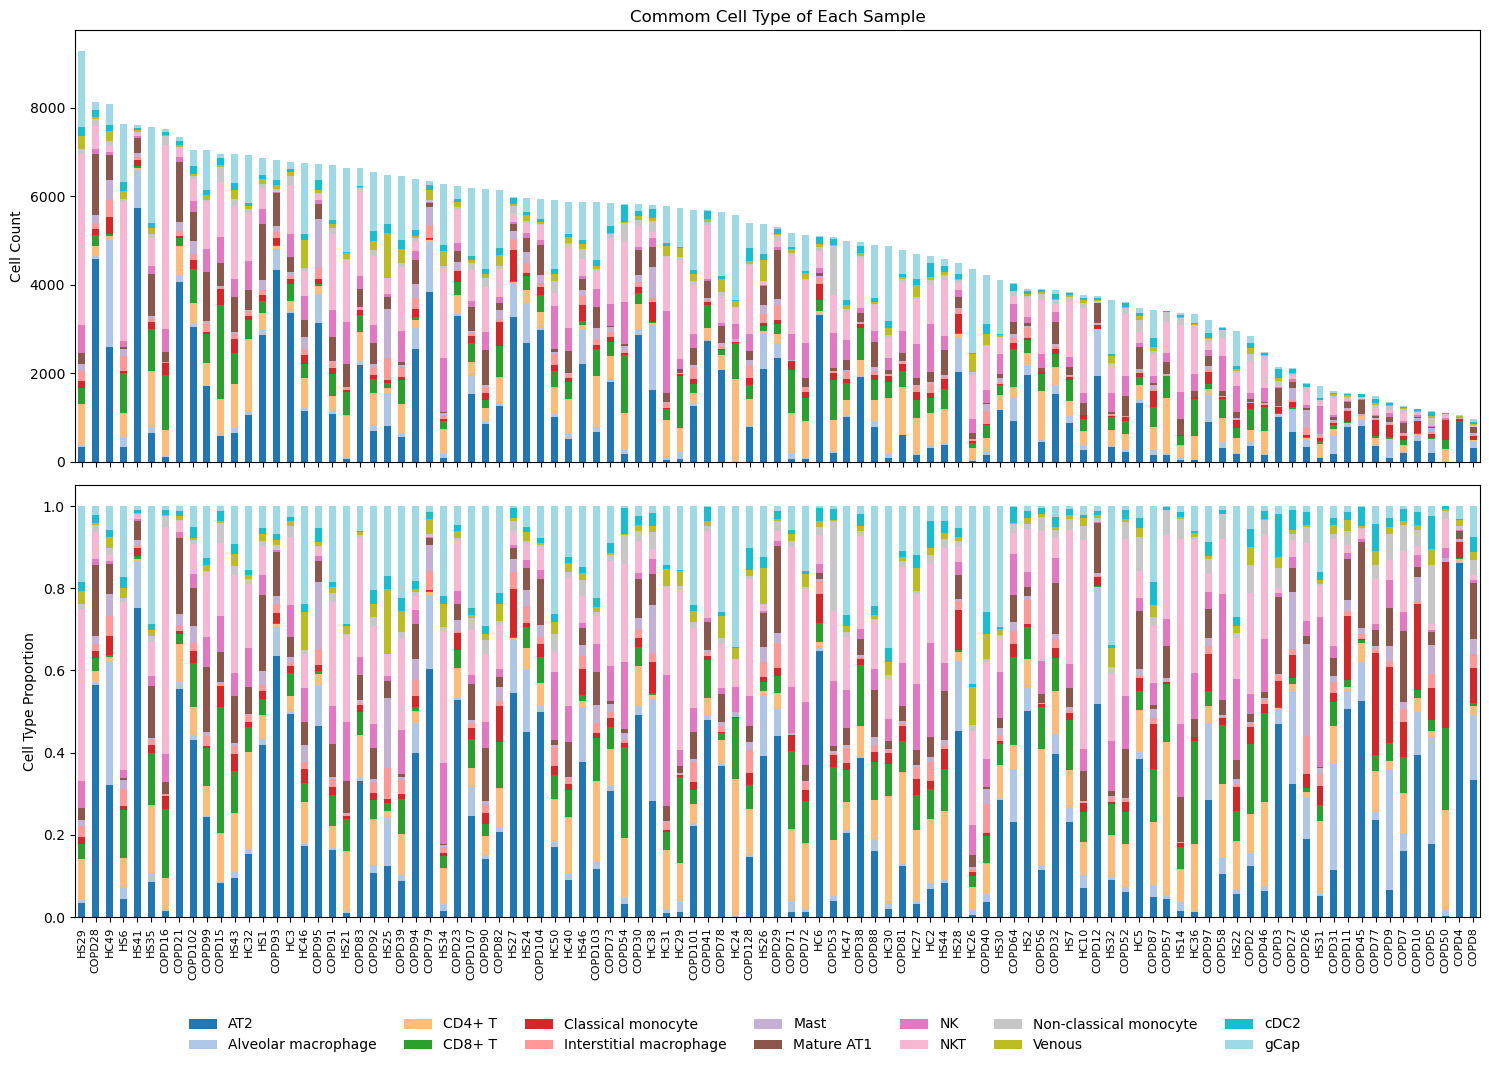

In [ ]:
### Number of cells per cell type [shared cell type]

cell_type_counts = adata.obs.groupby("sample")["celltype"].value_counts(normalize=True).unstack(fill_value=0) # count cells ratio per cell type
cell_type_counts_abs = adata.obs.groupby(["sample", "celltype"]).size().unstack(fill_value=0) # count number of cells per cell type
sample_cell_counts = cell_type_counts_abs.sum(axis=1) # count number of all cells for each donor
sorted_samples = sample_cell_counts.sort_values(ascending=False).index # donor ranked by number of cells 

common_cell_types = cell_type_counts_abs.columns[cell_type_counts_abs.min(axis=0) > 0]  # select shared cell type in all donor
cell_type_counts = cell_type_counts[common_cell_types]
cell_type_counts_abs = cell_type_counts_abs[common_cell_types]
sample_cell_counts_common = cell_type_counts_abs.sum(axis=1)
sorted_samples = sample_cell_counts_common.sort_values(ascending=False).index
# Q1, Q2 (median), Q3
Q1 = sample_cell_counts_common.quantile(0.25)
median = sample_cell_counts_common.median()
Q3 = sample_cell_counts_common.quantile(0.75)
IQR = Q3 - Q1 
whisker_low = Q1 - 1.5 * IQR 
whisker_high = Q3 + 1.5 * IQR
# donor reorder by number of all cells
cell_type_counts = cell_type_counts.loc[sorted_samples]
cell_type_counts_abs = cell_type_counts_abs.loc[sorted_samples]
cell_type_counts_norm = cell_type_counts_abs.div(cell_type_counts_abs.sum(axis=1), axis=0) # Normalize the absolute cell type counts to proportions (so that each row sums to 1)

# plot
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
cell_type_counts_norm.plot(kind="bar", stacked=True, ax=ax1, cmap="tab20", legend=False)
ax1.set_ylabel("Cell Type Proportion")
ax1.set_xlabel("")
ax1.set_title("")
ax1.set_xticklabels(cell_type_counts.index, rotation=90, ha="center", fontsize=8)
cell_type_counts_abs.plot(kind="bar", stacked=True, ax=ax2, cmap="tab20", legend=False)
ax2.set_ylabel("Cell Count")
ax2.set_title("Commom Cell Type of Each Sample")
ax2.set_xticklabels(cell_type_counts_abs.index, rotation=90, ha="center", fontsize=10)
# ax2.axhline(y=Q1, color='blue', linestyle='--', label=f'Q1: {Q1:.2f}', linewidth=1)
# ax2.axhline(y=median, color='red', linestyle='--', label=f'Median: {median:.2f}', linewidth=1)
# ax2.axhline(y=Q3, color='blue', linestyle='--', label=f'Q3: {Q3:.2f}', linewidth=1)
# ax2.axhline(y=whisker_low, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}', linewidth=1)
# ax2.axhline(y=whisker_high, color='purple', linestyle='--', label=f'Q3: {Q3:.2f}', linewidth=1)
# ax2.text(90, median+200, f'Median: {median:.0f}', ha='left', va='center', fontsize=10, color="red")
# ax2.text(91, Q1+200, f'Q1: {Q1:.0f}', ha='left', va='center', fontsize=10, color="blue")
# ax2.text(91, Q3+200, f'Q3: {Q3:.0f}', ha='left', va='center', fontsize=10, color="blue")
# ax2.text(89, whisker_low+150, f'Whisker Low: {whisker_low:.0f}', ha='left', va='center', fontsize=10, color="purple")
# ax2.text(88, whisker_high+200, f'Whisker High: {whisker_high:.0f}', ha='left', va='center', fontsize=10, color="purple")
# legend
handles, labels = ax1.get_legend_handles_labels() 
fig.legend(handles, labels, title="", bbox_to_anchor=(0.5, -0.01), loc='upper center', ncol=7, frameon=False, framealpha=0)
plt.tight_layout()
# plt.savefig("./before_celltype_distribution.pdf", format="pdf")
plt.show()

/tmp/ipykernel_3185832/972795354.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts_abs = adata.obs.groupby(["sample", "celltype"]).size().unstack(fill_value=0) # count number of cells per cell type
/tmp/ipykernel_3185832/972795354.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(common_cell_types, rotation=45, ha="right", fontsize=10)


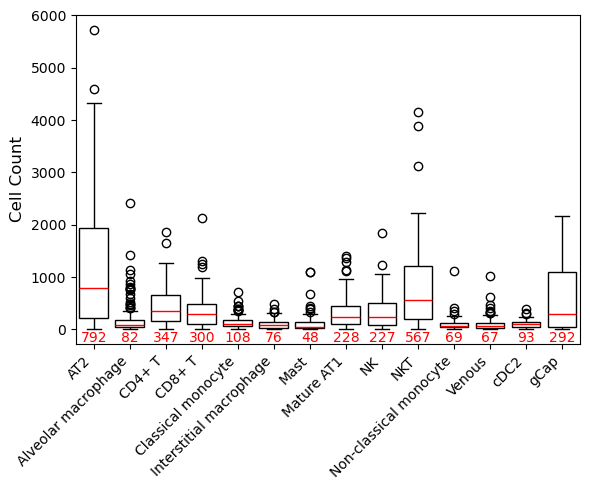

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

cell_type_counts_abs = adata.obs.groupby(["sample", "celltype"]).size().unstack(fill_value=0) # count number of cells per cell type
common_cell_types = cell_type_counts_abs.columns[cell_type_counts_abs.min(axis=0) > 0]  # common cell type
common_cell_type_counts_abs = cell_type_counts_abs[common_cell_types] # cells of common cell type 
common_cell_type_counts_long = common_cell_type_counts_abs.reset_index().melt(
    id_vars="sample", var_name="Cell Type", value_name="Cell Count"
)
stacked_data = common_cell_type_counts_abs.T

# plot
fig, ax1 = plt.subplots(1, 1, figsize=(6,5))
sns.boxplot(
    data=common_cell_type_counts_long,
    x="Cell Type",
    y="Cell Count",
    ax=ax1,
    boxprops=dict(facecolor="white", edgecolor="black"),  # 箱体：白色填充，黑色边框
    whiskerprops=dict(color="black"),  # 触须颜色
    capprops=dict(color="black"),  # 顶端线条颜色
    medianprops=dict(color="red"),  # 中位数线条颜色
    flierprops=dict(markeredgecolor="black")  # 异常值颜色
)

# 设置标题和标签
ax1.set_title("", fontsize=16)
ax1.set_ylabel("Cell Count", fontsize=12)
ax1.set_xlabel("")
ax1.set_xticklabels(common_cell_types, rotation=45, ha="right", fontsize=10)

# 添加中位数标注
medians = common_cell_type_counts_long.groupby("Cell Type")["Cell Count"].median()
for i, (cell_type, median) in enumerate(medians.items()):
    ax1.text(
        i, -160, f"{median:.0f}", color="red", ha="center", va="center", fontsize=10,
        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.3')
    )

plt.tight_layout()
# plt.savefig("./common_cell_count_distribution.pdf", format="pdf")
plt.show()

/tmp/ipykernel_3185832/2346820164.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts_abs = adata.obs.groupby(["sample", "celltype"]).size().unstack(fill_value=0) # count number of cells per cell type


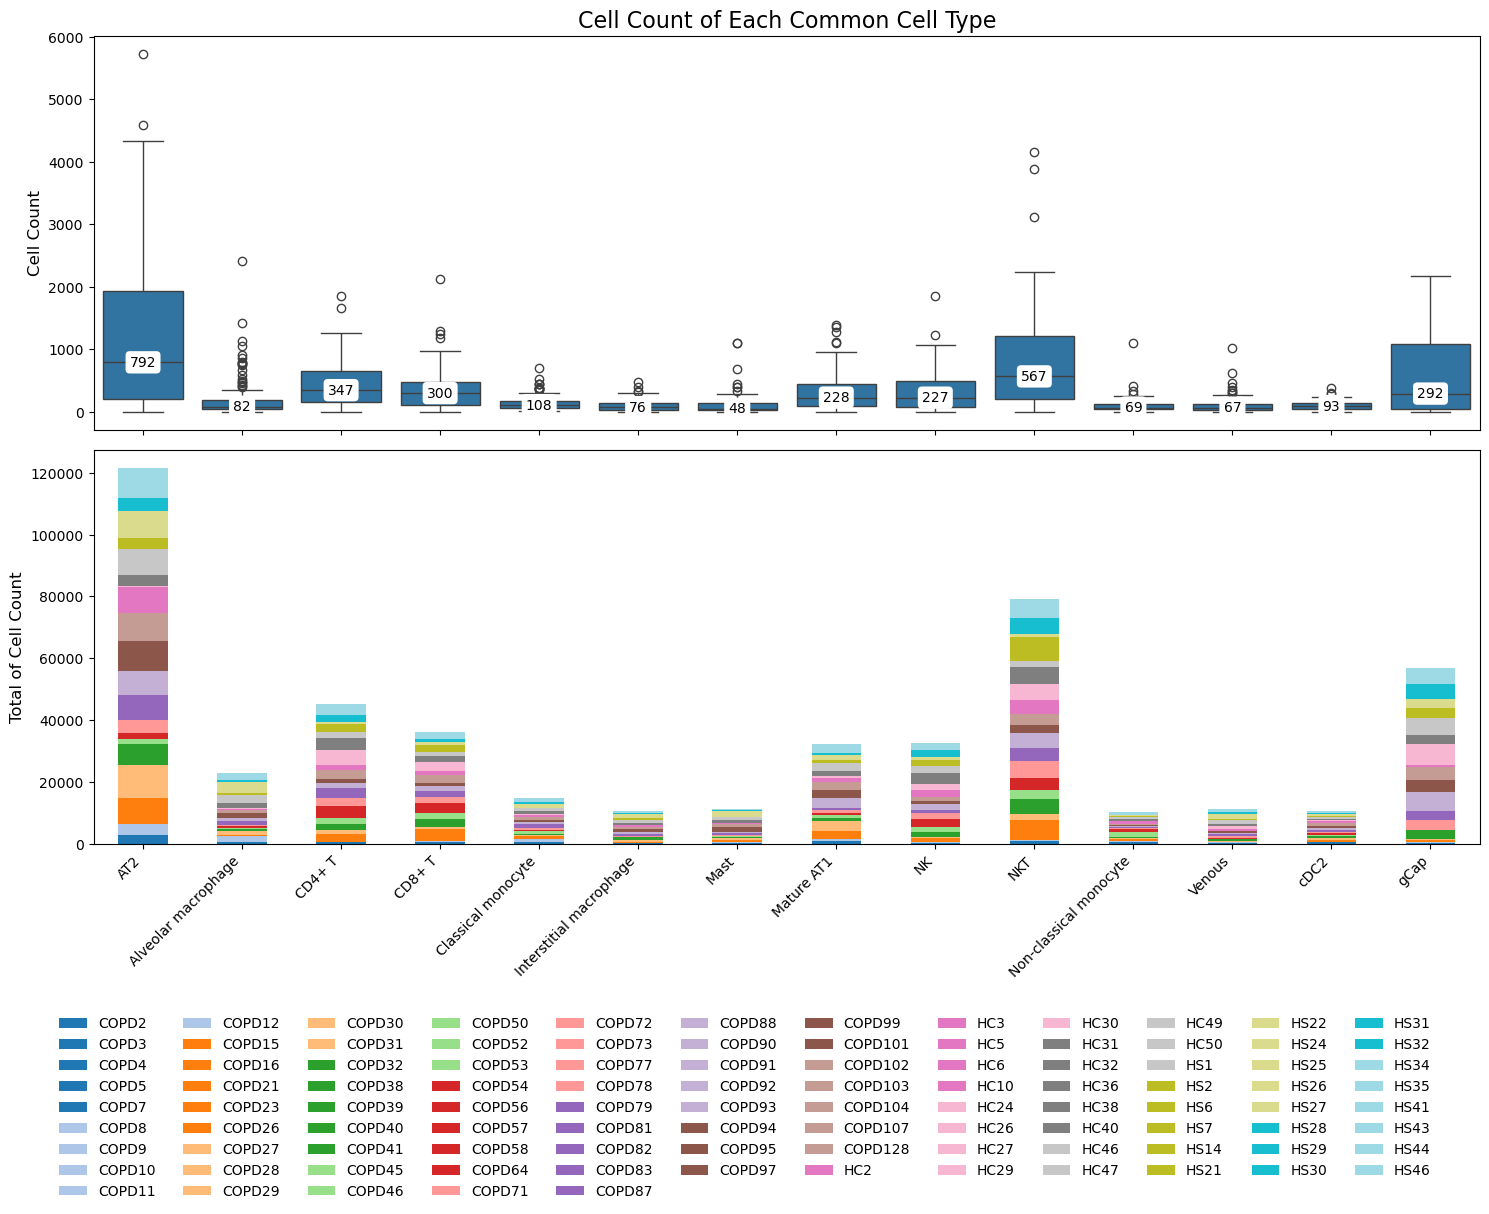

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

cell_type_counts_abs = adata.obs.groupby(["sample", "celltype"]).size().unstack(fill_value=0) # count number of cells per cell type
common_cell_types = cell_type_counts_abs.columns[cell_type_counts_abs.min(axis=0) > 0]  # common cell type
common_cell_type_counts_abs = cell_type_counts_abs[common_cell_types] # cells of common cell type 
common_cell_type_counts_long = common_cell_type_counts_abs.reset_index().melt(
    id_vars="sample", var_name="Cell Type", value_name="Cell Count"
)
stacked_data = common_cell_type_counts_abs.T

# plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [1, 1]}, sharex=True)
sns.boxplot(
    data=common_cell_type_counts_long,
    x="Cell Type",
    y="Cell Count",
    ax=ax1
)
ax1.set_title("Cell Count of Each Common Cell Type", fontsize=16)
ax1.set_ylabel("Cell Count", fontsize=12)
ax1.set_xlabel("")
medians = common_cell_type_counts_long.groupby("Cell Type")["Cell Count"].median()
for i, median in enumerate(medians):
    ax1.text(
        i, median, f"{median:.0f}", color="black", ha="center", va="center", fontsize=10,
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3')
    )
stacked_data.plot(kind="bar", stacked=True, ax=ax2, cmap="tab20", legend=False)
ax2.set_title("", fontsize=16)
ax2.set_ylabel("Total of Cell Count", fontsize=12)
ax2.set_xlabel("")
ax2.set_xticks(range(len(common_cell_types)))
ax2.set_xticklabels(common_cell_types, rotation=45, ha="right", fontsize=10)
# legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(
    handles, labels, title="",
    bbox_to_anchor=(0.5, -0.01), loc='upper center', ncol=12, frameon=False
)
plt.tight_layout()
# plt.savefig('./common_cell_count_distribution.png', dpi=300, bbox_inches='tight') # save
plt.show()

In [ ]:
### median of common cell type 
common_celltype_median = medians.to_dict()
print(common_celltype_median)

# ratio
total_cells = sum(common_celltype_median.values())
common_celltype_ratios = {cell: count / total_cells for cell, count in common_celltype_median.items()}
output_file = "cell_type_ratios.txt"
with open(output_file, "w") as f:
    for cell_type, ratio in common_celltype_ratios.items():
        f.write(f"{cell_type}\t{ratio:.6f}\n")
print(f"Cell type ratios saved to {output_file}")

{'AT2': 792.0, 'Alveolar macrophage': 82.0, 'CD4+ T': 347.0, 'CD8+ T': 300.0, 'Classical monocyte': 108.0, 'Interstitial macrophage': 76.0, 'Mast': 48.0, 'Mature AT1': 228.0, 'NK': 227.0, 'NKT': 567.0, 'Non-classical monocyte': 69.0, 'Venous': 67.0, 'cDC2': 93.0, 'gCap': 292.0}
Cell type ratios saved to cell_type_ratios.txt


In [ ]:
### select adata of common celltype

celltype_sets = set.intersection(*adata.obs.groupby('sample')['celltype'].apply(set))
adata_common = adata[adata.obs['celltype'].isin(celltype_sets)].copy()
print(f'common {len(celltype_sets)} celltypes: {celltype_sets}')

# with open('Common_cell_type.txt', 'w') as w:
#     for ct in celltype_sets:
#         print(f'{ct}\n', file=w)

/tmp/ipykernel_3185832/4096564960.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  celltype_sets = set.intersection(*adata.obs.groupby('sample')['celltype'].apply(set))


common 14 celltypes: {'CD4+ T', 'Venous', 'AT2', 'NK', 'Mast', 'Non-classical monocyte', 'Alveolar macrophage', 'Classical monocyte', 'CD8+ T', 'Mature AT1', 'Interstitial macrophage', 'gCap', 'NKT', 'cDC2'}


In [12]:
### HVGs selection
import scanpy as sc
import pandas as pd
import numpy as np

hvg_results = {}
for cell_type in celltype_sets:
    cell_type_data = adata_common[adata_common.obs['celltype'] == cell_type].copy()
    sc.pp.highly_variable_genes(
        cell_type_data,
        flavor='seurat',  # 使用Seurat的方法
        n_top_genes=500,    # 可调整
        subset=False
    )
    hvg_results[cell_type] = cell_type_data.var_names[cell_type_data.var['highly_variable']]
all_highly_variable_genes_set = set()
for cell_type, genes in hvg_results.items():
    all_highly_variable_genes_set.update(genes)
# count the frequency of HVG in different cell types
gene_sample_count = {gene: 0 for gene in all_highly_variable_genes_set}
for cell_type, genes in hvg_results.items():
    for gene in genes:
        gene_sample_count[gene] += 1
# occurs in at least one cell type
final_hvg = {}
for i in range(1,len(celltype_sets)+1):
    final_hvg.setdefault(i,[gene for gene, count in gene_sample_count.items() if count >= i])
for k,v in final_hvg.items():
    print(k,len(v))
final_HVGs = final_hvg[1]

1 4118
2 1177
3 614
4 368
5 265
6 155
7 99
8 63
9 46
10 35
11 26
12 17
13 11
14 6


In [13]:
### select final HVGs adata
filtered_genes = adata_common.var.index[adata_common.var.index.isin(final_HVGs)]
filtered_adata = adata_common[:, filtered_genes].copy()
print(f"Filtered AnnData contains {filtered_adata.n_vars} genes.")

Filtered AnnData contains 4118 genes.


In [14]:
### randomly cells per cell type for each donor to ensure the same ratio of cells 

import numpy as np
import scanpy as sc
np.random.seed(123)
sample_cell_matrices = {}
total_counts = sum(common_celltype_median.values())
cell_type_ratios = {cell_type: count / total_counts for cell_type, count in common_celltype_median.items()}
samples = filtered_adata.obs['sample'].unique() # donor id
for sample in samples:
    sample_data = filtered_adata[filtered_adata.obs['sample'] == sample]
    cell_type_counts_in_sample = sample_data.obs['celltype'].value_counts()
    total_cells_to_draw = sample_data.shape[0]
    # The total number of draws is dynamically adjusted until all cell types meet the requirements
    while True:
        target_counts = {cell_type: int(total_cells_to_draw * cell_type_ratios[cell_type]) 
                         for cell_type in cell_type_ratios}
        all_satisfied = all(cell_type_counts_in_sample.get(cell_type, 0) >= target_counts[cell_type]
                            for cell_type in cell_type_ratios)
        if all_satisfied:
            break
        total_cells_to_draw -= 1
    selected_cells = []
    for key, value in target_counts.items():
        if value == 0:
            target_counts[key] = 1
    # final randomly cells
    for cell_type, target_count in target_counts.items():
        cell_type_data = sample_data[sample_data.obs['celltype'] == cell_type]
        cell_indices = cell_type_data.obs.index
        # If the number of cells is insufficient, use all cells; Otherwise random selection
        if len(cell_indices) <= target_count:
            selected_indices = cell_indices
        else:
            selected_indices = np.random.choice(cell_indices, target_count, replace=False)
        selected_cells.extend(selected_indices)
    selected_data = sample_data[selected_cells, :]
    sample_cell_matrices[sample] = selected_data
# print final shape
for sample, matrix in sample_cell_matrices.items():
    print(f"Sample: {sample}, Shape: {matrix.shape}")

Sample: COPD2, Shape: (773, 4118)
Sample: COPD3, Shape: (70, 4118)
Sample: COPD4, Shape: (18, 4118)
Sample: COPD5, Shape: (94, 4118)
Sample: COPD7, Shape: (117, 4118)
Sample: COPD8, Shape: (74, 4118)
Sample: COPD9, Shape: (249, 4118)
Sample: COPD10, Shape: (149, 4118)
Sample: COPD11, Shape: (155, 4118)
Sample: COPD12, Shape: (46, 4118)
Sample: COPD15, Shape: (876, 4118)
Sample: COPD16, Shape: (199, 4118)
Sample: COPD21, Shape: (947, 4118)
Sample: COPD23, Shape: (1466, 4118)
Sample: COPD26, Shape: (191, 4118)
Sample: COPD27, Shape: (251, 4118)
Sample: COPD28, Shape: (1715, 4118)
Sample: COPD29, Shape: (681, 4118)
Sample: COPD30, Shape: (1170, 4118)
Sample: COPD31, Shape: (510, 4118)
Sample: COPD32, Shape: (1121, 4118)
Sample: COPD38, Shape: (676, 4118)
Sample: COPD39, Shape: (729, 4118)
Sample: COPD40, Shape: (282, 4118)
Sample: COPD41, Shape: (227, 4118)
Sample: COPD45, Shape: (61, 4118)
Sample: COPD46, Shape: (331, 4118)
Sample: COPD50, Shape: (20, 4118)
Sample: COPD52, Shape: (445, 4

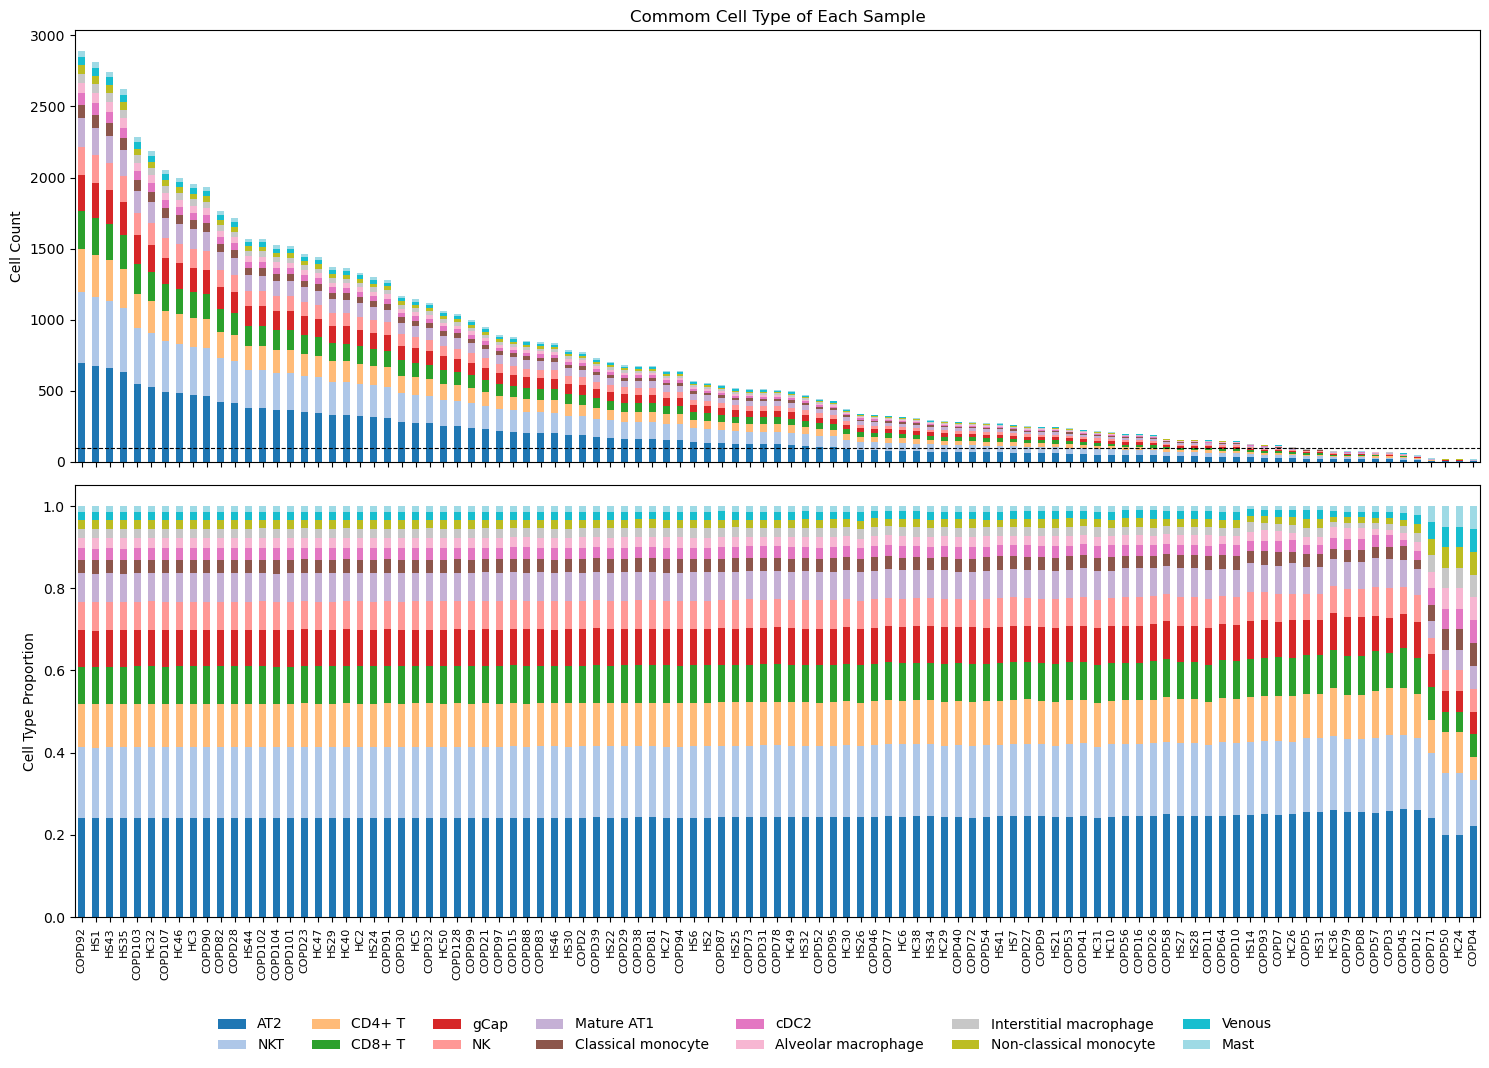

In [ ]:
### Number of cells per cell type [Random cells]

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cell_type_counts_per_sample = {}
total_cells_per_sample = {}

for sample, adata in sample_cell_matrices.items():
    cell_type_counts = adata.obs['celltype'].value_counts().to_dict()
    cell_type_counts_per_sample[sample] = cell_type_counts
    total_cells_per_sample[sample] = adata.shape[0]
cell_type_df = pd.DataFrame(cell_type_counts_per_sample).fillna(0)
total_cells_df = pd.Series(total_cells_per_sample, name="TotalCells")

# cells ratio
cell_type_ratio_df = cell_type_df.div(total_cells_df, axis=1)
# donor ranked by random cells 
sorted_samples = total_cells_df.sort_values(ascending=False).index
cell_type_df = cell_type_df[sorted_samples]
cell_type_ratio_df = cell_type_ratio_df[sorted_samples]

# plot
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
cell_type_ratio_df.T.plot(kind="bar", stacked=True, ax=ax1, cmap="tab20", legend=False)
ax1.set_ylabel("Cell Type Proportion")
ax1.set_xlabel("")
ax1.set_title("")
ax1.set_xticklabels(cell_type_ratio_df.T.index, rotation=90, ha="center", fontsize=8)
cell_type_df.T.plot(kind="bar", stacked=True, ax=ax2, cmap="tab20", legend=False)
ax2.set_ylabel("Cell Count")
ax2.set_title("Commom Cell Type of Each Sample")
ax2.set_xticklabels(cell_type_df.T.index, rotation=90, ha="center", fontsize=10)
ax2.axhline(y=100, color='black', linestyle='--', linewidth=0.8) # y=100 
# legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title="", bbox_to_anchor=(0.5, -0.01), loc='upper center', ncol=7, frameon=False, framealpha=0)
plt.tight_layout()
# plt.savefig("./after_celltype_distribution.pdf", format="pdf")
plt.show()

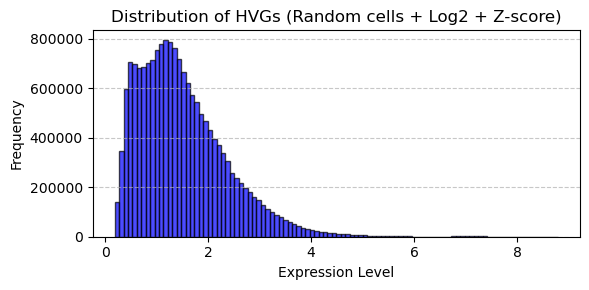

In [ ]:
### Gene expression distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

processed_matrices = {}
for sample, matrix in sample_cell_matrices.items():
    dense_matrix = matrix.X.toarray() if hasattr(matrix.X, "toarray") else matrix.X # Sparse matrix becomes dense matrix
    processed_matrices[sample] = dense_matrix
all_gene_expression = np.concatenate([mat.ravel() for mat in processed_matrices.values()])
all_gene_expression = all_gene_expression[all_gene_expression > 0]

# histogram
plt.figure(figsize=(6, 3))
plt.hist(all_gene_expression, bins=100, edgecolor='black', color="blue", alpha=0.7)
plt.title("Distribution of HVGs (Random cells + Log2 + Z-score)")
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
# plt.savefig("./commonCT_HVGnormalization_distribution_RandomCell.pdf", format="pdf")
plt.show()

In [17]:
### combine into a final pre-processed single cell profile h5ad file
import scanpy as sc
adata_list = list(sample_cell_matrices.values())
combined_adata = adata_list[0].concatenate(
    adata_list[1:],
    join='outer',
    index_unique='-',
)
print(combined_adata)

/tmp/ipykernel_3185832/2442192801.py:4: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined_adata = adata_list[0].concatenate(


AnnData object with n_obs × n_vars = 74670 × 4118
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'barcode', 'Sex', 'Age', 'BMI', 'Stage', 'FEV1', 'FVC', 'FEV1%pred', 'Group', 'Disease', 'celltype', 'batch'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'


In [18]:
### save gene name
gene_names = combined_adata.var.index.tolist()
with open("GeneRanks_within_scPIT.txt", "w") as f:
    for gene in gene_names:
        f.write(gene + "\n")
### save pre-processed single cell profile h5ad file
combined_adata.obs.rename(columns={'barcode': 'barcode_col'}, inplace=True)
# combined_adata.write("./combined_adata_101_2981_4118.h5ad", compression="gzip")


In [19]:
### combined_adata to tensor & MSK
import torch
import numpy as np

samples = combined_adata.obs['sample'].unique()
n_samples = len(samples)
# max cells and gene
max_cells = max(combined_adata.obs['sample'].value_counts())
n_genes = combined_adata.shape[1]
# default
meta_tensor = torch.zeros((n_samples, 3), dtype=torch.float32)  # BMI, Age, Sex, smky
expr_tensor = torch.zeros((n_samples, max_cells, n_genes), dtype=torch.float32)  # default 0
expr_mask = torch.ones((n_samples, max_cells), dtype=torch.float32)  # default 1
celltype_tensor = torch.zeros((n_samples, max_cells), dtype=torch.long)  # celltype

fev1_values = []
bmi_values = []
age_values = []
sex_values = []
disease_values = []

for i, sample in enumerate(samples):
    sample_data = combined_adata[combined_adata.obs['sample'] == sample].X
    sample_data = torch.tensor(sample_data.toarray(), dtype=torch.float32)
    n_cells = sample_data.shape[0]
    expr_tensor[i, :n_cells, :] = sample_data
    expr_mask[i, :n_cells] = 0.0  # set the true cells = 1 in padding mask
    # cell type encoded
    cell_types = combined_adata[combined_adata.obs['sample'] == sample].obs['celltype'].values
    unique_cell_types = {ctype: idx for idx, ctype in enumerate(np.unique(combined_adata.obs['celltype']))}
    celltype_encoded = torch.tensor([unique_cell_types[ctype] for ctype in cell_types], dtype=torch.long)
    print(unique_cell_types)
    # celltype tensor
    celltype_tensor[i, :n_cells] = celltype_encoded
    # fev1%pred
    fev1_value = combined_adata[combined_adata.obs['sample'] == sample].obs['FEV1%pred'].iloc[0]
    fev1_values.append(fev1_value)
    # BMI AGE
    bmi = combined_adata[combined_adata.obs['sample'] == sample].obs['BMI'].iloc[0]
    bmi_values.append(bmi)
    age = combined_adata[combined_adata.obs['sample'] == sample].obs['Age'].iloc[0]
    age_values.append(age)
    # Sex: (e.g., 0 = Female, 1 = Male)
    sex = 1 if combined_adata[combined_adata.obs['sample'] == sample].obs['Sex'].iloc[0] == "Male" else 0
    sex_values.append(sex)
    # Disease: (e.g., 0 = Control, 1 = COPD)
    disease = 1 if combined_adata[combined_adata.obs['sample'] == sample].obs['Disease'].iloc[0] == "COPD" else 0
    disease_values.append(disease)

### z-score
fev1_values_z = [(x - np.mean(fev1_values)) / np.std(fev1_values) for x in fev1_values]
bmi_values_z = [(x - np.mean(bmi_values)) / np.std(bmi_values) for x in bmi_values]
age_values_z = [(x - np.mean(age_values)) / np.std(age_values) for x in age_values]

# convert FEV1_list to PyTorch tensor
fev1_tensor = torch.tensor(fev1_values_z, dtype=torch.float32)
Decease_tensor = torch.tensor(disease_values, dtype=torch.float32)
# meta 
for i in range(len(bmi_values_z)):
    meta_tensor[i] = torch.tensor([bmi_values_z[i], age_values_z[i], sex_values[i]], dtype=torch.float32)

print(meta_tensor.shape)
print(fev1_tensor.shape)
print(expr_tensor.shape)
print(expr_mask.shape)
print(celltype_tensor.shape)



{'AT2': 0, 'Alveolar macrophage': 1, 'CD4+ T': 2, 'CD8+ T': 3, 'Classical monocyte': 4, 'Interstitial macrophage': 5, 'Mast': 6, 'Mature AT1': 7, 'NK': 8, 'NKT': 9, 'Non-classical monocyte': 10, 'Venous': 11, 'cDC2': 12, 'gCap': 13}
{'AT2': 0, 'Alveolar macrophage': 1, 'CD4+ T': 2, 'CD8+ T': 3, 'Classical monocyte': 4, 'Interstitial macrophage': 5, 'Mast': 6, 'Mature AT1': 7, 'NK': 8, 'NKT': 9, 'Non-classical monocyte': 10, 'Venous': 11, 'cDC2': 12, 'gCap': 13}
{'AT2': 0, 'Alveolar macrophage': 1, 'CD4+ T': 2, 'CD8+ T': 3, 'Classical monocyte': 4, 'Interstitial macrophage': 5, 'Mast': 6, 'Mature AT1': 7, 'NK': 8, 'NKT': 9, 'Non-classical monocyte': 10, 'Venous': 11, 'cDC2': 12, 'gCap': 13}
{'AT2': 0, 'Alveolar macrophage': 1, 'CD4+ T': 2, 'CD8+ T': 3, 'Classical monocyte': 4, 'Interstitial macrophage': 5, 'Mast': 6, 'Mature AT1': 7, 'NK': 8, 'NKT': 9, 'Non-classical monocyte': 10, 'Venous': 11, 'cDC2': 12, 'gCap': 13}
{'AT2': 0, 'Alveolar macrophage': 1, 'CD4+ T': 2, 'CD8+ T': 3, 'Clas

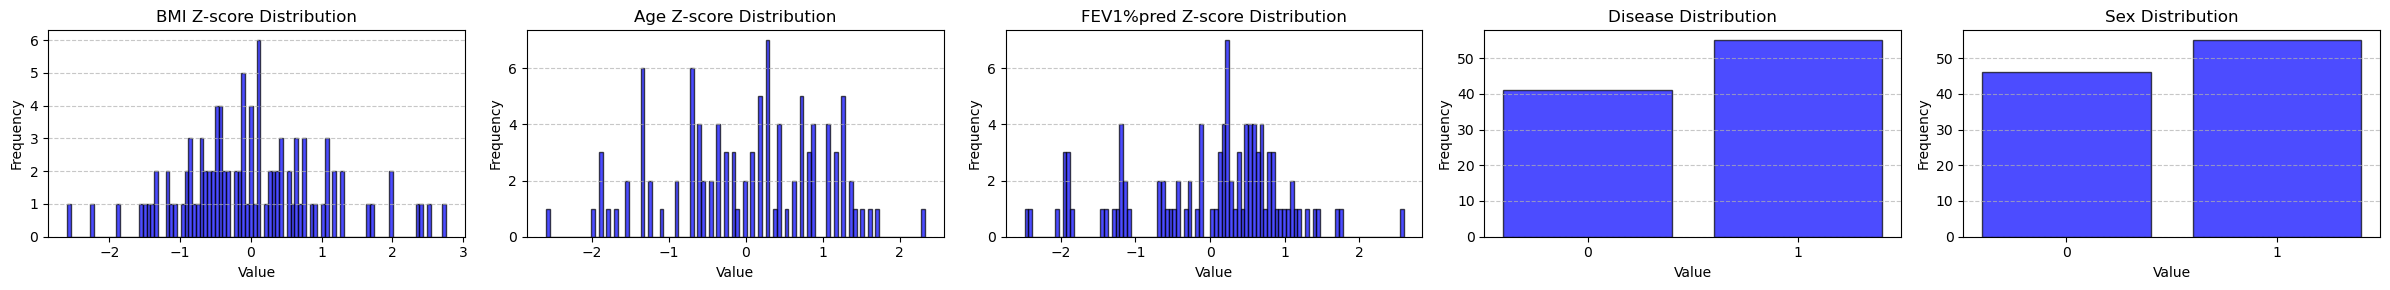

In [ ]:
import matplotlib.pyplot as plt

expr_tensor_flat = expr_tensor.flatten()
# plot
fig, axes = plt.subplots(1, 5, figsize=(24,3))
# bmi
axes[0].hist(bmi_values_z, bins=100, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title("BMI Z-score Distribution")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
# age
axes[1].hist(age_values_z, bins=100, color='blue', alpha=0.7, edgecolor='black')
axes[1].set_title("Age Z-score Distribution")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
# fev1
axes[2].hist(fev1_values_z, bins=100, color='blue', alpha=0.7, edgecolor='black')
axes[2].set_title("FEV1%pred Z-score Distribution")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Frequency")
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
# disease status
disease_counts = {0: sum(disease == 0 for disease in disease_values), 1: sum(disease == 1 for disease in sex_values)}
axes[3].bar(disease_counts.keys(), disease_counts.values(), color='blue', alpha=0.7, edgecolor='black')
axes[3].set_title("Disease Distribution")
axes[3].set_xticks([0, 1])
axes[3].set_xlabel("Value")
axes[3].set_ylabel("Frequency")
axes[3].grid(axis='y', linestyle='--', alpha=0.7)
# sex
sex_counts = {0: sum(sex == 0 for sex in sex_values), 1: sum(sex == 1 for sex in sex_values)}
axes[4].bar(sex_counts.keys(), sex_counts.values(), color='blue', alpha=0.7, edgecolor='black')
axes[4].set_title("Sex Distribution")
axes[4].set_xticks([0, 1])
axes[4].set_xlabel("Value")
axes[4].set_ylabel("Frequency")
axes[4].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# plt.savefig("./data_distribution.pdf", format="pdf")
plt.show()

In [24]:
### save into a .pth file
import torch

save_path = "./101_2981_4118.pth" ## For the scPIT model training
torch.save({
    "expr_tensor": expr_tensor,
    "expr_mask": expr_mask,
    "meta_tensor": meta_tensor,
    "fev1_tensor": fev1_tensor,
    "celltype_tensor": celltype_tensor,
    "target": Decease_tensor
}, save_path)

print(f"Tensors saved to {save_path}")

Tensors saved to ./101_2981_4118.pth
